<a href="https://colab.research.google.com/github/samvdh1996/DSP_B6/blob/Elise/Tweet_and_ACLED_activity_plots_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#I'm using colab so I can run multiple things at the same time, and using GPU it seems faster
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
#Using your google drive for this makes things a lot easier, this is the Filtered 2 million document
data = pd.read_csv('/content/drive/MyDrive/userlocationComleteLatLong.csv')

In [58]:
data.shape

(1880706, 9)

In [59]:
#Create the right time format
weekday=data["Created At"].str.split(" ", n = 1, expand = True) 
month=weekday[1].str.split(" ", n = 1, expand = True) 
day=month[1].str.split(" ", n = 1, expand = True)
time=day[1].str.split(" ", n = 1, expand = True) 
hour=time[0].str.split(":", n = 3, expand = True) 
data['month']=month[0]
data['day']=day[0]
data['day']=data["day"].astype(str) #In order to merge it into a date later on it's a string 
data['time']=time[0]
data['year']='2020'
data['hour']=hour[0]
data['minute']=hour[1]
data['second']=hour[2]


In [60]:
data.head()

,Created At,Id,Lang,Place,State2,Text,User Location,Latitude (generated),Longitude (generated),month,day,time,year,hour,minute,second
0,Sun Jun 14 00:18:08 +0000 2020,1271960074454515712,en,Grand Rapids,MI,RT @_VFran_: If you rally for wrestlers on the...,"Grand Rapids, MI","42,9632","-85,6679",Jun,14,00:18:08,2020,00,18,08
1,Sun Jun 14 00:18:07 +0000 2020,1271960071153414144,en,Long Beach,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Long Beach, CA","33,7775","-118,1885",Jun,14,00:18:07,2020,00,18,07
2,Sun Jun 14 00:18:07 +0000 2020,1271960070641704960,en,Costa Mesa,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Costa Mesa, CA","33,6633","-117,9033",Jun,14,00:18:07,2020,00,18,07
3,Sun Jun 14 00:18:07 +0000 2020,1271960069387825152,en,Joplin,MO,RT @JoshuaPotash: It seems like we're seeing l...,"Joplin, MO","37,0842","-94,5133",Jun,14,00:18:07,2020,00,18,07
4,Sun Jun 14 00:18:06 +0000 2020,1271960067785371650,en,Los Angeles,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Los Angeles, CA","34,0544","-118,2439",Jun,14,00:18:06,2020,00,18,06


In [61]:
#Turn months into numbers
data.month=data.month.str.replace('May', '05', regex=True) 
data.month=data.month.str.replace('Jun', '06', regex=True)
#Create date format and turn into datetime format
data["date"] = data["year"]+"-"+data["month"]+"-"+ data["day"]
data["timestamp"] = data['date']+ "-" + data["hour"].astype(str) +"-"+data["minute"].astype(str)+"-"+data["second"].astype(str)
data["timestamp"] = pd.to_datetime(data["timestamp"], format="%Y-%m-%d-%H-%M-%S")
#Drop stuff you don't want anymore
data=data.drop(['year','month','day','minute','second'], axis=1)
#Now sorting by time is easy
data=data.sort_values(by=['timestamp'])
data.head()


,Created At,Id,Lang,Place,State2,Text,User Location,Latitude (generated),Longitude (generated),time,hour,date,timestamp
0,Sun Jun 14 00:18:08 +0000 2020,1271960074454515712,en,Grand Rapids,MI,RT @_VFran_: If you rally for wrestlers on the...,"Grand Rapids, MI","42,9632","-85,6679",00:18:08,00,2020-06-14,2020-06-14 00:18:08
1,Sun Jun 14 00:18:07 +0000 2020,1271960071153414144,en,Long Beach,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Long Beach, CA","33,7775","-118,1885",00:18:07,00,2020-06-14,2020-06-14 00:18:07
2,Sun Jun 14 00:18:07 +0000 2020,1271960070641704960,en,Costa Mesa,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Costa Mesa, CA","33,6633","-117,9033",00:18:07,00,2020-06-14,2020-06-14 00:18:07
3,Sun Jun 14 00:18:07 +0000 2020,1271960069387825152,en,Joplin,MO,RT @JoshuaPotash: It seems like we're seeing l...,"Joplin, MO","37,0842","-94,5133",00:18:07,00,2020-06-14,2020-06-14 00:18:07
4,Sun Jun 14 00:18:06 +0000 2020,1271960067785371650,en,Los Angeles,CA,RT @JoshuaPotash: The Paris #BlackLivesMatter ...,"Los Angeles, CA","34,0544","-118,2439",00:18:06,00,2020-06-14,2020-06-14 00:18:06


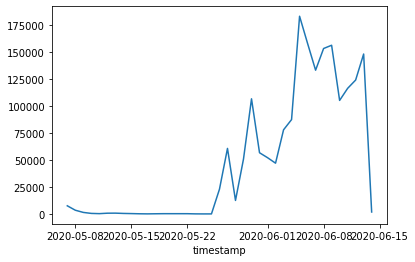

In [89]:
data.groupby(data['timestamp'].dt.date).size().plot() #By changing the dt.date into dt.hour or other formats, you can see activity per various date types
#print(data.groupby(data['timestamp'].dt.date).size()) #List of sizes per date

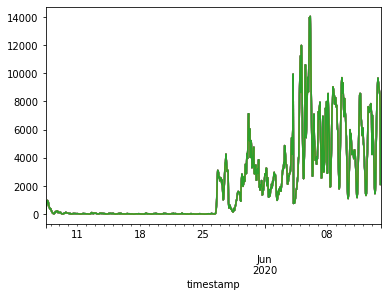

In [88]:
test = data.groupby([data['timestamp'].dt.to_period('H')]).count()#.unstack() #This plots it per hour per date
test.plot(legend=0,) #Remove the legend it shows on default


In [91]:
acled = pd.read_csv('/content/drive/MyDrive/ACLEDwithaddress.csv') #Import the ACLED dataset with the adresses, see 
#https://amsuni-my.sharepoint.com/:f:/g/personal/elise_mertens_student_uva_nl/EiDO45mW2X5Jnjgl2SObG7YBGID5hBuKEDxo2AV4Zia6HA?e=eLPOSz

In [106]:
acled.head()

,Unnamed: 0,EVENT_DATE,LATITUDE,LONGITUDE,road,city,town,state,timestamp
0,0,2020-05-07,40.714,-74.006,Chambers Street,New York,0,New York,2020-05-07
1,1,2020-05-09,39.769,-86.158,Monument Circle,Indianapolis,0,Indiana,2020-05-09
2,2,2020-05-17,31.150,-81.492,0,0,Brunswick,Georgia,2020-05-17
3,3,2020-05-21,43.038,-87.906,North Jefferson Street,Milwaukee,0,Wisconsin,2020-05-21
4,4,2020-05-23,41.586,-93.623,Skywalk,Des Moines,0,Iowa,2020-05-23


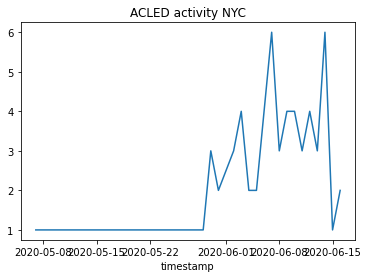

In [129]:
#Again create the timestamp format
acled["timestamp"] = pd.to_datetime(acled["EVENT_DATE"], format="%Y-%m-%d")
#Only select the dates also in the Tweet dataset
mayjune = (acled['timestamp'] > '2020-5-1') & (acled['timestamp'] <= '2020-6-16')
acledmayjune= acled.loc[mayjune]
#Select a specific state or city like New York
acledmayjuneca=acledmayjune[acledmayjune['city'].str.contains('New York')]
acledmayjuneca.groupby(acledmayjuneca['timestamp'].dt.date).size().plot(title='ACLED activity NYC')
#acledmayjuneca.groupby(acledmayjuneca['timestamp'].dt.date).size()

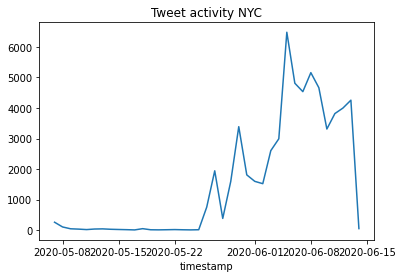

In [146]:
#Same but for the Tweets
dataCA=data[data['Place'].str.contains('New York')]
dataCA.groupby(dataCA['timestamp'].dt.date).size().plot(title='Tweet activity NYC')


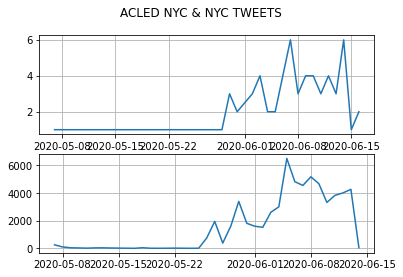

In [145]:
#Two ugly plots
fig, axs = plt.subplots(2)

fig.suptitle('ACLED NYC & NYC TWEETS')
axs[0].plot(acledmayjuneca.groupby(acledmayjuneca['timestamp'].dt.date).size())

axs[0].grid()

axs[1].plot(dataCA.groupby(dataCA['timestamp'].dt.date).size())
axs[1].grid()
